<a href="https://colab.research.google.com/github/AhmadAlabrash/Ro-Deep-Learning/blob/main/RO_DL_CNN_vs_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [38]:
(X,Y),(x,y)=datasets.cifar10.load_data()
X

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [39]:
X_sc=X/255
x_sc=x/255

In [40]:
Y  = Y.reshape(-1,)
y  = y.reshape(-1,)
labels =['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','ship']

In [41]:
def im(i):
  plt.figure(figsize=(6,6))
  plt.imshow(x[i])
  
  plt.xlabel(labels[y[i]])

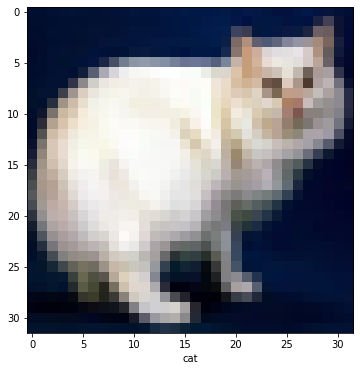

In [42]:
im(565)

In [43]:
X.shape

(50000, 32, 32, 3)

In [48]:
#here we use ann
model = keras.Sequential([
    layers.Flatten(),
    layers.Dense(200,activation='relu'),
    layers.Dense(100,activation='relu'),
    layers.Dense(10,activation='sigmoid'),
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_sc ,Y, 10)

5000/5000 [==============================] - 27s 5ms/step - loss: 1.8766 - accuracy: 0.3192


In [49]:
model.evaluate(x_sc,y)

313/313 [==============================] - 1s 3ms/step - loss: 1.7860 - accuracy: 0.3591


[1.786030888557434, 0.35910001397132874]

In [55]:
model = keras.Sequential([
   

    layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu' ,input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(200,activation='relu'),
    layers.Dense(100,activation='relu'),
    layers.Dense(10,activation='sigmoid'),
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_sc ,Y, 10)

5000/5000 [==============================] - 104s 21ms/step - loss: 1.3574 - accuracy: 0.5094


In [56]:
model.evaluate(x_sc,y)

313/313 [==============================] - 5s 16ms/step - loss: 1.0959 - accuracy: 0.6106


[1.0958715677261353, 0.6105999946594238]